In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/raw/PublicDataSet_anonymized_200520.csv', sep=';', keep_default_na=False)

In [3]:
translation_keys = {
    'Age_at_diagnosis': {'26 - 45 years': 1, '46 - 65 years': 2, '66 - 85 years': 3, '<= 25 years': 0, '> 85 years': 4},
    'Sex': {'Male': 0, 'Female': 1},
    'Month_first_diagnosis': {'<= 3': 0, '4': 1},
    'Year_first_diagnosis': {2020: 0},
    'Uncomplicated_phase': {'yes': 1, 'no': 0},
    'Complicated_phase': {'yes': 1, 'no': 0},
    'Critical_phase': {'yes': 1, 'no': 0},
    'Recovery_phase': {'yes': 1, 'no': 0},
    'Vasopressors_in_complicated_phase': {'unknown/missing': 0, 'yes': 3, 'no': 2, 'n/a': 1},
    'Vasopressors_in_critical_phase': {'unknown/missing': 0, 'yes': 3, 'no': 2, 'n/a': 1},
    'Invasive_ventilation_in_critical_phase': {'unknown/missing': 0, 'yes': 3, 'no': 2, 'n/a': 1},
    'Superinfection_in_uncomplicated_phase': {'unknown/missing': 0, 'none': 2, 'bacterial': 3, 'n/a': 1},
    'Superinfection_in_complicated_phase': {'unknown/missing': 0, 'none': 2, 'bacterial': 3, 'n/a': 1},
    'Superinfection_in_critical_phase': {'n/a': 1, 'none': 2, 'fungal': 3, 'unknown/missing': 0, 'bacterial&fungal': 5, 'bacterial': 4},
    'Symptoms_in_recovery_phase': {'yes': 3, 'n/a': 1, 'no': 2, 'unknown/missing': 0},
    'Last_known_patient_status': {'Not recovered (means recovery phase not achieved)': 1, 'Dead from COVID-19': 2, 'Dead from other causes':3 , 'Recovered': 4, 'unknown/missing': 0},
}

In [4]:
# translate data into numbers for machine learning and save to csv file
for name in data.columns:
    data[name] = [translation_keys[name][patient] for patient in data[name]]

data.to_csv('data/processed/processed_patient_data.csv', index=False, header=False)

In [5]:
processed_data = np.genfromtxt('data/processed/processed_patient_data.csv', delimiter=',')

num_classes = [5, 2, 2, 1, 2, 2, 2, 2, 4, 4, 4, 4, 4, 6, 4, 5]
arrays_to_concat = []

for i in range(processed_data.shape[1]):
    arrays_to_concat.append(keras.utils.to_categorical(processed_data[:,i], num_classes=num_classes[i]))

categorical_data = np.concatenate(arrays_to_concat, axis=1)

np.random.shuffle(processed_data)

In [6]:
train_data = categorical_data[:1500, :48]
train_label = categorical_data[:1500, -5:]

test_data = categorical_data[1500:, :48]
test_label = categorical_data[1500:, -5:]

In [20]:
model = keras.Sequential([
    keras.layers.Input(shape=(48,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
history = model.fit(train_data, train_label, epochs=200, batch_size=32)

0.6340
Epoch 2/200
47/47 [==============================] - 0s 1ms/step - loss: 1.1987 - accuracy: 0.7067
Epoch 3/200
47/47 [==============================] - 0s 1ms/step - loss: 1.1843 - accuracy: 0.7053
Epoch 4/200
47/47 [==============================] - 0s 1ms/step - loss: 1.1658 - accuracy: 0.7313
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 1.1563 - accuracy: 0.7633
Epoch 6/200
47/47 [==============================] - 0s 1ms/step - loss: 1.1197 - accuracy: 0.8167
Epoch 7/200
47/47 [==============================] - 0s 1ms/step - loss: 1.0895 - accuracy: 0.8213
Epoch 8/200
47/47 [==============================] - 0s 1ms/step - loss: 1.0810 - accuracy: 0.8253
Epoch 9/200
47/47 [==============================] - 0s 2ms/step - loss: 1.0816 - accuracy: 0.8233
Epoch 10/200
47/47 [==============================] - 0s 2ms/step - loss: 1.0794 - accuracy: 0.8260
Epoch 11/200
47/47 [==============================] - 0s 1ms/step - loss: 1.0767 - accuracy: 0.8293
E

In [22]:
test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=2)

14/14 - 0s - loss: 1.0530 - accuracy: 0.8516


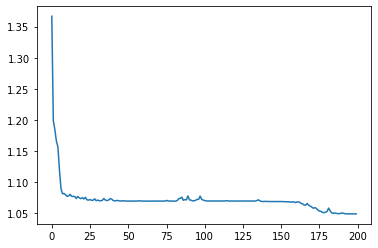

In [30]:
plt.clf()
plt.plot(history.history['loss'])
plt.show()

In [31]:
plt.savefig('patient.png')

<Figure size 432x288 with 0 Axes>

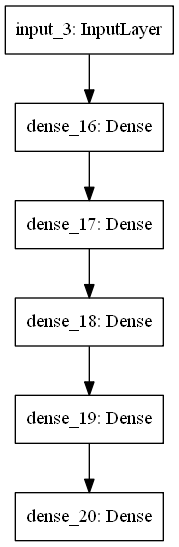

In [25]:
tf.keras.utils.plot_model(model, to_file='model2.png')